# Data Exploration of hand-activities dataset by Laput and Harrison
The research paper describes the data collection process as follows:

>We recruited 12 people from a public participant pool
(9 female, mean age 26.6), who were compensated $20 for
the 90-minute study. Participants were asked to wear our
smartwatch on their dominant arm. Once comfortable, the
“obstacle course” began. Each “lap” of the course consisted
of visiting four stations with physical activities that incorporated the 25 hand activities (random order). Participants
performed each hand activity for at least 15 seconds, and
they were free to perform them however they saw fit, capturing natural user variation.
>
>In total, participants completed four laps of our course,
with three-minute breaks in between. Tis ensured temporal separation between data collection rounds. Additionally, in between laps three and four, participants were asked
to remove and then re-wear the smartwatch, again to capture variation and to mitigate overfiting (common in worn
sensing systems). A trained observer labeled data using a
laptop interface immediately afer each hand activity was
performed. This process yielded 2500 labeled instances per
session, per user, resulting in a total of 120K instances.

Laput, G. and Harrison, C., 2019, May. Sensing fine-grained hand activity with smartwatches. In Proceedings of the 2019 CHI Conference on Human Factors in Computing Systems (pp. 1-13).


## Structure and size
The dataset is quite extensive. The experiments have been done with **12** users over **25** different hand activities.

Each user has performed 4 rounds in the obstacle course, rounds 1-3 are done in a similar way. For round 4 each user
took his smartwatch off his hand and wore it again.

The data is structured in two ways:
* Per round
* Per user

**The raw data is not available! Only the already preprocessed spectrogram.**

## Load data
The data is available as npy array files, these can be imported in the following way:

In [1]:
import numpy as np

data_path = '/mnt/data/hand-activity-data/'
round1_x = np.load(data_path + 'rounds/round1_features_X.npy')
round1_y = np.load(data_path + 'rounds/round1_features_Y.npy')
round1_labels = np.load(data_path + 'rounds/round1_features_labels.npy')

print(round1_x.shape)
print(round1_y.shape)
print(round1_labels.shape)
print(round1_y)
print(round1_labels)

(31174, 3, 256, 48)
(31174,)
(31174,)
[0 0 0 ... 0 0 0]
['Brushing Hair' 'Brushing Hair' 'Brushing Hair' ... 'Brushing Hair'
 'Brushing Hair' 'Brushing Hair']


As can be seen for each round or user there are three files:
* `features_X`: the spectrograms
* `features_Y`: the classes [0-24]
* `features_labels`: the classes, but written as labels

## Class distribution
The samples are quite equally distributed over the different classes. Per round we have around 1200 samples per class.
Which are around the 2500 samples per user per round as described in the paper.


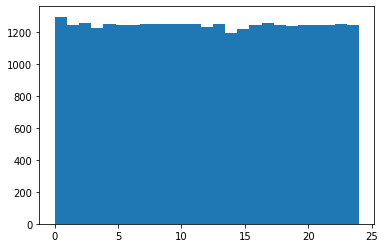

In [2]:
import matplotlib.pyplot as plt
plt.hist(round1_y, bins=25)
plt.show()


Also the distribution of samples over the different rounds is very similar:

In [3]:
round1_y = np.load(data_path + 'rounds/round1_features_Y.npy')
round2_y = np.load(data_path + 'rounds/round2_features_Y.npy')
round3_y = np.load(data_path + 'rounds/round3_features_Y.npy')
round4_y = np.load(data_path + 'rounds/round4_features_Y.npy')

print('samples in Round 1: {}'.format(round1_y.shape))
print('samples in Round 2: {}'.format(round2_y.shape))
print('samples in Round 3: {}'.format(round3_y.shape))
print('samples in Round 4: {}'.format(round4_y.shape))


samples in Round 1: (31174,)
samples in Round 2: (31175,)
samples in Round 3: (31087,)
samples in Round 4: (31203,)


## Examples of a spectrogram
To visualize an example of one of the spectrograms

Showing spectrogram for:  Brushing Teeth


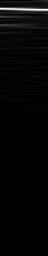

In [7]:
import numpy as np
from PIL import Image

testsample = 300
testaxis = 1

data_path = '/mnt/data/hand-activity-data/'
user1_x = np.load(data_path + 'users/features/U1_features_X.npy')
user1_labels = np.load(data_path + 'users/features/U1_features_labels.npy')

print('Showing spectrogram for: ', user1_labels[testsample])

example_spectrogram = user1_x[testsample][testaxis]
example_spectrogram = example_spectrogram.flatten()
example_spectrogram = np.reshape(example_spectrogram, (48,256)).swapaxes(0,1)

max = np.max(example_spectrogram)

create_grayscale_im = np.vectorize(lambda x: (x / max * 255))
grayscale_im = create_grayscale_im(example_spectrogram)
grayscale_im = grayscale_im.astype(np.uint8)

im = Image.fromarray(grayscale_im)
display(im)

## Wrong coding of the data!!
As can be seen in the code above some mistake has been made when saving/creating the spectrograms. While the structure
of the data is right 256x48 I assume that at some point somebody flattened the input and put them back into the wrong
direction.

So far it is unclear to me if the models were also trained with the skewed input or not, but considering the rather
good results I would assume that that is not the case. It definitely is something to keep in mind though when we train
on this data.